In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
df = pd.read_csv("Desktop/nn/data.csv")

In [6]:
df.head(199)

,No.,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35
0,1,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,2,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,3,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,4,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,5,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,195,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,196,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,197,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [7]:
df.rename(columns={'Column1': 'ID No', 
                   'Column2': 'Outcome',
                   'Column3': 'Time',
                   'Column4': 'Radius1',
                   'Column5': 'Texture1',
                   'Column6': 'Perimeter1',
                   'Column7': 'Area1',
                   'Column8': 'Smoothness1',
                   'Column9': 'Compactness1',
                   'Column10': 'Concavity1',
                   'Column11': 'ConcavePoints1',
                   'Column12': 'Symmetry1',
                   'Column13': 'FractalDim1',
                   'Column14': 'Radius2',
                   'Column15': 'Texture2',
                   'Column16': 'Perimeter2',
                   'Column17': 'Area2',
                   'Column18': 'Smoothness2',
                   'Column19': 'Compactness2',
                   'Column20': 'Concavity2',
                   'Column21': 'ConcavePoints2',
                   'Column22': 'Symmetry2',
                   'Column23': 'FractalDim2',
                   'Column24': 'Radius3',
                   'Column25': 'Texture3',
                   'Column26': 'Perimeter3',
                   'Column27': 'Area3',
                   'Column28': 'Smoothness3',
                   'Column29': 'Compactness3',
                   'Column30': 'Concavity3',
                   'Column31': 'ConcavePoints3',
                   'Column32': 'Symmetry3',
                   'Column33': 'FractalDim3',
                   'Column34': 'Tumor Diameter',
                   'Column35': 'Lymph Nodes Removed'},inplace=True)

In [8]:
df.head(199)

,No.,ID No,Outcome,Time,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDim3,Tumor Diameter,Lymph Nodes Removed
0,1,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,2,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,3,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,4,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,5,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,195,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,196,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,197,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [9]:
## Source (unique): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html
df['Outcome'].unique()

array(['N', 'R'], dtype=object)

In [10]:
## Change 'N' (Non-Recurring) to '-1' and 'R' (Recurring) to 1

df['Outcome'] = df['Outcome'].apply(lambda x: -1 if x=='N' else 1)

In [11]:
df.head(199)

,No.,ID No,Outcome,Time,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDim3,Tumor Diameter,Lymph Nodes Removed
0,1,119513,-1,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,2,8423,-1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,3,842517,-1,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,4,843483,-1,123,11.42,20.38,77.58,386.1,0.14250,0.28390,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,5,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,942640,-1,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,195,943471,-1,8,15.44,31.18,101.00,740.4,0.09399,0.10620,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,196,94547,-1,12,17.17,29.19,110.00,915.3,0.08952,0.06655,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,197,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [12]:
import matplotlib.pyplot as plt

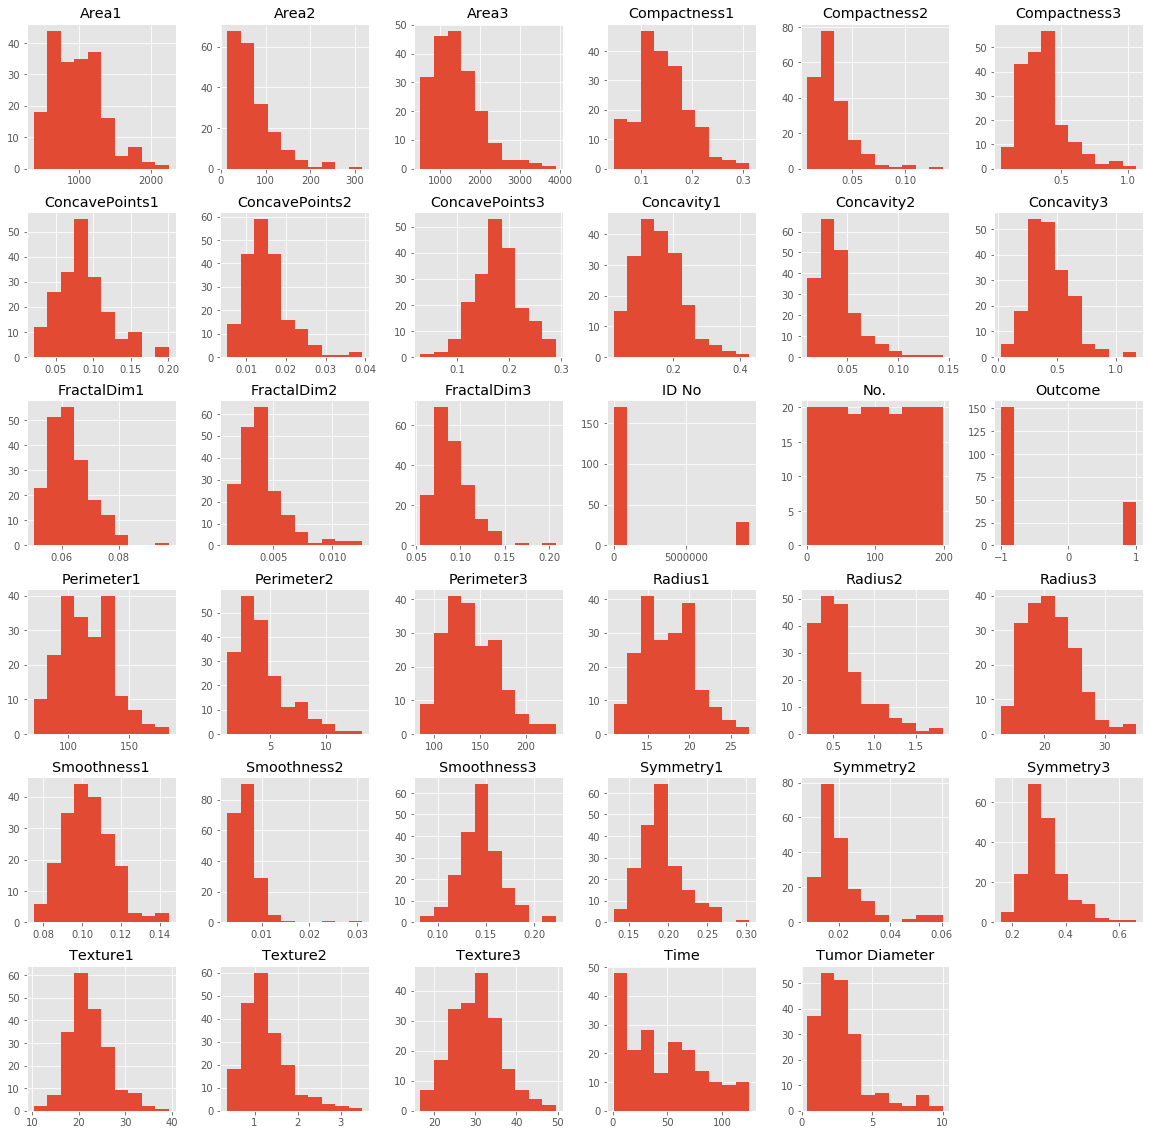

In [13]:
## Source graphs: https://github.com/tifabi/100DaysOfMLCode/blob/55e3695ebfeefff91e2edb15bcf9c443eebc6864/ML_Algorithms/Pipelines/Pipeline_Example.ipynb
%matplotlib inline
plt.style.use('ggplot')
pd.DataFrame.hist(df, figsize = [20,20]);

In [14]:
# -- Preprocessing --
# We know from the column descriptions provided with the datset and from viewing the data 
# that there are two non-numeric columns:
# Take a look at the data
# **Note: that the second and last column are type "object", these columns must have 
#         some nonnumeric values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  198 non-null    int64  
 1   ID No                198 non-null    int64  
 2   Outcome              198 non-null    int64  
 3   Time                 198 non-null    int64  
 4   Radius1              198 non-null    float64
 5   Texture1             198 non-null    float64
 6   Perimeter1           198 non-null    float64
 7   Area1                198 non-null    float64
 8   Smoothness1          198 non-null    float64
 9   Compactness1         198 non-null    float64
 10  Concavity1           198 non-null    float64
 11  ConcavePoints1       198 non-null    float64
 12  Symmetry1            198 non-null    float64
 13  FractalDim1          198 non-null    float64
 14  Radius2              198 non-null    float64
 15  Texture2             198 non-null    flo

In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [16]:
# -- Missing Values --
# The variable 'Lymph node status' was also type 'object', explore why using value_counts
# **Note: There are 4 '?'

df['Lymph Nodes Removed'].value_counts()

0     87
1     35
2     17
4     10
7      6
13     6
?      4
9      4
3      4
6      3
15     3
11     3
8      2
27     2
5      2
10     2
20     2
16     1
24     1
18     1
17     1
14     1
21     1
Name: Lymph Nodes Removed, dtype: int64

In [17]:
'''
Addressing Missing Values
As mentioned previously, the WPBC dataset contains a lot of missing values (specifically in the Lymph Nodes Removed column). Data could be missing due to a variety of reasons. Primarily it could be due to

1. Missing at Random - Propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
2. Missing Completely at Random - The fact that a certain value is missing has nothing to do with its hypothetical value and with the values of other variables.
3. Missing not at Random - Two possible reasons are that the missing value depends on the hypothetical value (e.g. People with high salaries generally do not want to reveal their incomes in surveys) or missing value is dependent on some other variable’s value (e.g. Let’s assume that females generally don’t want to reveal their ages! Here the missing value in age variable is impacted by gender variable)
In the first two cases, it is safe to remove the data with missing values depending upon their occurrences, while in the third case removing observations with missing values can produce a bias in the model.

Ref: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
Source: https://github.com/ashnair1/Classification-using-TensorFlow/blob/18eec28f3f2e4609d7e7c36b17911ef5044a0b8b/TF%20Classification%202%20-%20Breast%20Cancer%20Prognosis%20.ipynb

Since it could be hypothesised that the missing values in the Lymph Nodes removed columns are missing at random, we could address this issue by simply removing the record of those patients with missing values.
'''

df = df.drop(df[df['Lymph Nodes Removed']=='?'].index)

In [18]:
# Counting acctual outcomes without 4 '?'
df['Outcome'].value_counts()

-1    148
 1     46
Name: Outcome, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 197
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  194 non-null    int64  
 1   ID No                194 non-null    int64  
 2   Outcome              194 non-null    int64  
 3   Time                 194 non-null    int64  
 4   Radius1              194 non-null    float64
 5   Texture1             194 non-null    float64
 6   Perimeter1           194 non-null    float64
 7   Area1                194 non-null    float64
 8   Smoothness1          194 non-null    float64
 9   Compactness1         194 non-null    float64
 10  Concavity1           194 non-null    float64
 11  ConcavePoints1       194 non-null    float64
 12  Symmetry1            194 non-null    float64
 13  FractalDim1          194 non-null    float64
 14  Radius2              194 non-null    float64
 15  Texture2             194 non-null    flo

In [20]:
# Handle with Data Part:


 # Getting train and test length
def get_train_n_test_len(data, percent):
        length = len(data)
        train_len = round(length * percent)
        test_len = length - train_len
        return train_len, test_len
 

 # Creating sets for train and test
 # train_f == train features, test_f == test features
 # from_mid == take a features (data) to test part from a middle
 # "np.ndarray": data-type object describes the format of each element in the array (its byte-order, how many bytes 
 # it occupies in memory, whether it is an integer, a floating point number, or something else, etc.)
 # "np.ndarray" example: 
 # np.ndarray(shape=(2,2), dtype=float, order='F') => [[0.0e+000, 0.0e+000], [ nan, 2.5e-323]]
 # Source ndarray (NumPy): https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html
 # "np.vstack" example: a = [1, 2], b = [3, 4] => np.vstack(a,b) => [ [1,2], [3,4] ]
 # Source vstack (Numpy): https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
 #
 # Explanation: In our example data_split() method is built to split data into 2 options:
 # Option 1: If from_mid receives a true bool value -> it take the features (data) from the middle to part of 
 # the test (from number 66 to 131, i.e. 66<= count <= 131) and everything else (the starting part of the data,
 # where the count <= 65, and the final part of the data, where the count <= 193) take part of the training.
 # Otherwise, (from_mid receives a false bool value) takes 128 initial features (data) (the initial part) to the 
 # training part and the rest to the test.
def data_split(data: np.ndarray, train_len: np.int, test_len: np.int, take_from_mid: bool) \
        -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    
        train_f = np.empty((0, 33), float)
        train_diagnoses = np.array([])
        
        test_f = np.empty((0, 33), float)
        test_diagnoses = np.array([])
        
        count = 0
        
        # Option 1:
        if take_from_mid:
            for line in data:
                tmp_x = np.array(line[2:])
                tmp_y = line[1:2]
                # if count<66 -> take features (data) from a beginning to train part
                if count < test_len:
                    train_f = np.vstack((train_f, tmp_x))
                    train_diagnoses = np.append(train_diagnoses, [tmp_y])
                # elif 66<=count<=131 -> take features (data) from the middle to test part    
                elif test_len <= count and count < test_len * 2:
                    test_f = np.vstack((test_f, tmp_x))
                    test_diagnoses = np.append(test_diagnoses, [tmp_y])
                # else (count<132) -> take the rest features (data) from the final to train part 
                else:
                    train_f = np.vstack((train_f, tmp_x))
                    train_diagnoses = np.append(train_diagnoses, [tmp_y])
                    
                count += 1    
        
        # Option 2: 
        else:
            for line in data:
                tmp_x = np.array(line[2:])
                tmp_y = line[1:2]
                # take features (data) to the train part
                if count < train_len:
                    train_f = np.vstack((train_f, tmp_x))
                    train_diagnoses = np.append(train_diagnoses, [tmp_y])
                # take the rest features (data) to the test part   
                else:
                    test_f = np.vstack((test_f, tmp_x))
                    test_diagnoses = np.append(test_diagnoses, [tmp_y])
                    
                count += 1
                    
                
        return train_f, train_diagnoses, test_f, test_diagnoses

    
 # standardization() method to standardize values from one type to float type after values updates (or fixing)
 # "mean()" function can be used to calculate mean/average of a given list of numbers. It returns mean 
 # of the data set passed as parameters.
 # Source "mean()" (GeeksforGeeks): https://www.geeksforgeeks.org/python-statistics-mean-function/
 # "std()" Returns the standard deviation, a measure of the spread of a distribution, of the array elements. 
 # The standard deviation is computed for the flattened array by default, otherwise over the specified axis.
 # Source "std()" (NumPy): https://numpy.org/doc/stable/reference/generated/numpy.std.html
 # mat == matrix
def standardization(mat):
        mat_std = np.copy(mat)
        for i in range(0, len(mat_std[0])):
            # mat_std(i = column) = ( mat(i) - avg of mat(i) ) / standard deviation of i column of mat(i)
            mat_std[:, i] = (mat[:, i] - mat[:, i].mean()) / mat[:, i].std()
            
        return mat_std
    

 # calc_actual() to calculate negative and positive results
 # neg == negative, pos == positive, t == targets
def calc_actual(t):
        pos = 0
        neg = 0
        for item in t:
            if item == 1:
                pos += 1
            else:
                neg += 1
        return pos, neg\


 # Calculating the prediction table
 # true_pos == true positive, false_neg == false negative, false_pos == false positive, true_neg == true negative
 # t == targets
 # Explanation: 
 # true positive: 
 # target result: The cancer had recurred | prediction: The algorithm predicted that the cancer had recurred
 # false negative:
 # target result: The cancer had recurred | prediction: The algorithm predicted that the cancer had Non-recurred
 # false positive:
 # target result: The cancer had Non-recurred | prediction: The algorithm predicted that the cancer had recurred
 # true negative:
 # target result: The cancer had Non-recurred | prediction: The algorithm predicted that the cancer had Non-recurred
def check_predictions(t, predictions):
        true_pos = 0
        false_neg = 0
        false_pos = 0
        true_neg = 0
        for i in range(0, len(predictions)):
            if t[i] == 1 and predictions[i] == 1:
                true_pos += 1
            elif t[i] == 1 and predictions[i] == -1:
                false_neg += 1
            elif t[i] == -1 and predictions[i] == 1:
                false_pos += 1
            else:
                true_neg += 1
                
                
        return true_pos, false_neg, false_pos, true_neg
  

 # Checking and printing the score
 # true_pos == true positive, false_neg == false negative, false_pos == false positive, true_neg == true negative
def check_score(true_pos, false_neg, false_pos, true_neg):
        
        print(f"true positive: {true_pos}")
        print(f"false negative: {false_neg}")
        print(f"false positive: {false_pos}")
        print(f"true negative: {true_neg}\n")
        
        total_all = true_pos + false_neg + false_pos + true_neg
        total_true = true_pos + true_neg  # total really positive
        acc = total_true / total_all
        total_pos = true_pos + false_pos  # total classified as positive
        try:
            precision = true_pos / total_pos
            recall = true_pos / (true_pos + false_neg)
            f_score = (2 * recall * precision) / (recall + precision)
            print(f"accuracy: {round(acc, 2)}")
            print(f"precision: {round(precision, 2)}")
            print(f"recall: {round(recall, 2)}")
            print(f"f_score: {round(f_score, 2)}\n")
        # Catch and throw divide by zero error    
        except ZeroDivisionError:
            print("Error: The cases will predicted negative or Non-positive input data")
        


In [21]:
# Adaline Algorithm Part:
# f == features, t == target, w == wights, lr == alpha == learning rate


# Training data and weights and compute loss
def train_n_comp_loss(f, t, w, lr, n_epochs):
        loss_array = np.array([])
        
        for iteration in range(n_epochs):
            # Net input = net_inp = y_in = [Sigma(i from 1 to n) x(i)*w(i)] + w(0)
            # w(0) == bias
            net_inp = np.dot(f, w[1:]) + w[0]
            
            # Error sum
            squared_error = (t - net_inp)
            
            # Fit and Update weights and bias (w(0)) if error != 0
            # t == target
            # w(new) = w(old) + alpha * (t - y_in) * x(i)
            w[1:] += lr * np.dot(f.T, squared_error)
            # bias(new) = bias(old) + alpha * (t - y_in)
            w[0] += lr * squared_error.sum()
            
            
            # Loss: Sum of squared error : 1/2 * [Sigma(i from 1 to n) (y_in)^2]
            loss = (squared_error**2).sum() * 0.5
            # To array
            loss_array = np.append(loss_array, [loss])
            
        return w, loss_array
    
# Get predictions    
def predict(f, w, threshold, pos_val, neg_val):
        # pos_val == positive value, neg_val == neagtive value
        # If y_in >= 0 -> returns 1, Otherwise -> returns -1
        return np.where(np.dot(f, w[1:]) + w[0] >= threshold, pos_val, neg_val)

In [22]:

#lst = df.drop(['No.'], axis=1)
currLst = df.drop(['No.'], axis=1)
#mylst = lst.values.tolist()
currLst


,ID No,Outcome,Time,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDim3,Tumor Diameter,Lymph Nodes Removed
0,119513,-1,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,-1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,-1,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,-1,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,9411300,-1,3,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,...,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21
193,942640,-1,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,-1,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,-1,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0


In [23]:
myLst = currLst.values.tolist()

In [24]:
# Decrease the decimal number after the point
# Purpose: For easier calculation
# 1.100101 => 1.1001
for line in myLst:
        for i in range(2, len(line)):
            if isinstance(line[i], str):
                line[i] = float(line[i])
                line[i] = round(line[i], 4)
            else:
                line[i] = float(line[i])

In [ ]:
myLst

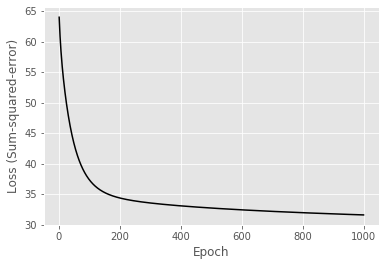

Code execution time: 0.17 seconds
true positive: 4
false negative: 10
false positive: 1
true negative: 51

accuracy: 0.83
precision: 0.8
recall: 0.29
f_score: 0.42



,Loss (Sum-squared-error),Epoch
0,64.000000,1
1,62.805735,2
2,61.745835,3
3,60.795017,4
4,59.933235,5
...,...,...
995,31.612313,996
996,31.610676,997
997,31.609041,998
998,31.607407,999


In [26]:
import matplotlib.pyplot as plt
import time

# Implementation Adaline algorithm Part A:
# First Example: number of epochs (n_epochs) = 1000, learning rate (lr) = 0.0001
# Most recommended is that learning rate should be equal to 0.1 <= n_epochs * lr <= 1.0 --> 
# 0.1/n_epochs <= lr --> 0.1 / 1000 = 0.0001 <= lr

# start time report
start = time.time()


# Calculating 66% of dataset length
train_len, test_len = get_train_n_test_len(myLst, 0.66)


# Creating sets for train and test features (datas)
# train_f == train features, test_f == test features
train_f, train_diagnoses, test_f, test_diagnoses \
    = data_split(myLst, train_len, test_len, False)
train_f = standardization(train_f)
test_f = standardization(test_f)


# Array of weights, training data and weigths
# w == weights
# Initialize the weight (to zero) for each feature (and the dummy feature, x0)
# Training the train features and diagnoses with all initial wights, learning rate and num of epochs
# Getting fixed (or updated) weights and array of Loss values (training error).
w = np.zeros(1 + train_f.shape[1])
w, loss_array = train_n_comp_loss(train_f, train_diagnoses, w, 0.0001, 1000)


# Plot the training error
plt.plot(range(1, len(loss_array) + 1), loss_array, color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.show()


# predict target of tests features by our fixed (or updated) weights, threshold, and pos and neg values
# calculate actual recurred (yes) and not recurred (no)
# get predictions of our real pos and neg results
# act_rec == actual recurred (yes), act_not_rec == actual not recurred (no)
# true_pos == true positive, false_neg == false negative, false_pos == false positive, true_neg == true negative
predictions = predict(test_f, w, 0.0, 1, -1)
act_rec, act_not_rec = calc_actual(test_diagnoses)
true_pos, false_neg, false_pos, true_neg = check_predictions(test_diagnoses, predictions)


# end time report
end = time.time()
print(f"Code execution time: {round(end - start, 2)} seconds")
check_score(true_pos, false_neg, false_pos, true_neg)

# Loss == t - y_in
df3 = pd.DataFrame({'Loss (Sum-squared-error)' : loss_array, 'Epoch' : range(1, len(loss_array) + 1)})
df3

In [27]:
df2 = pd.DataFrame({'First method: 66%-33%': ['',''] , 
                   ' ':    [ "Actual: yes  ",  "Actual: no  "],
                   'Predicted: yes': [f"true positive: {round(true_pos / act_rec, 2)}%",
                                      f"false positive: {round(false_pos / act_not_rec, 2)}%"],
                   'Predicted: no': [f"false negative: {round(false_neg / act_rec, 2)}%", 
                                      f"true negative: {round(true_neg / act_not_rec, 2)}%"]})

df2.head()

,First method: 66%-33%,,Predicted: yes,Predicted: no
0,,Actual: yes,true positive: 0.29%,false negative: 0.71%
1,,Actual: no,false positive: 0.02%,true negative: 0.98%


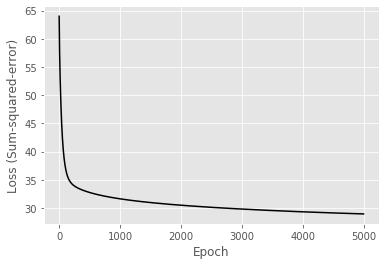

Code execution time: 0.31 seconds
true positive: 5
false negative: 9
false positive: 2
true negative: 50

accuracy: 0.83
precision: 0.71
recall: 0.36
f_score: 0.48



,Loss (Sum-squared-error),Epoch
0,64.000000,1
1,62.805735,2
2,61.745835,3
3,60.795017,4
4,59.933235,5
...,...,...
4995,28.928795,4996
4996,28.928467,4997
4997,28.928140,4998
4998,28.927812,4999


In [28]:
import matplotlib.pyplot as plt
import time

# Implementation Adaline algorithm Part A:
# Second Example: number of epochs (n_epochs) = 5000, learning rate (lr) = 0.0001
# Most recommended is that learning rate should be equal to 0.1 <= n_epochs * lr <= 1.0 --> 
# 0.1/n_epochs <= lr --> 0.1 / 1000 = 0.0001 <= lr

# start time report
start = time.time()


# Calculating 66% of dataset length
train_len, test_len = get_train_n_test_len(myLst, 0.66)


# Creating sets for train and test features (datas)
# train_f == train features, test_f == test features
train_f, train_diagnoses, test_f, test_diagnoses \
    = data_split(myLst, train_len, test_len, False)
train_f = standardization(train_f)
test_f = standardization(test_f)


# Array of weights, training data and weigths
# w == weights
# Initialize the weight (to zero) for each feature (and the dummy feature, x0)
# Training the train features and diagnoses with all initial wights, learning rate and num of epochs
# Getting fixed (or updated) weights and array of Loss values (training error).
w = np.zeros(1 + train_f.shape[1])
w, loss_array = train_n_comp_loss(train_f, train_diagnoses, w, 0.0001, 5000)


# Plot the training error
plt.plot(range(1, len(loss_array) + 1), loss_array, color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.show()


# predict target of tests features by our fixed (or updated) weights, threshold, and pos and neg values
# calculate actual recurred (yes) and not recurred (no)
# get predictions of our real pos and neg results
# act_rec == actual recurred (yes), act_not_rec == actual not recurred (no)
# true_pos == true positive, false_neg == false negative, false_pos == false positive, true_neg == true negative
predictions = predict(test_f, w, 0.0, 1, -1)
act_rec, act_not_rec = calc_actual(test_diagnoses)
true_pos, false_neg, false_pos, true_neg = check_predictions(test_diagnoses, predictions)


# end time report
end = time.time()
print(f"Code execution time: {round(end - start, 2)} seconds")
check_score(true_pos, false_neg, false_pos, true_neg)


# Loss == t - y_in
df3 = pd.DataFrame({'Loss (Sum-squared-error)' : loss_array, 'Epoch' : range(1, len(loss_array) + 1)})
df3

In [29]:
df2 = pd.DataFrame({'First method: 66%-33%': ['',''] , 
                   ' ':    [ "Actual: yes  ",  "Actual: no  "],
                   'Predicted: yes': [f"true positive: {round(true_pos / act_rec, 2)}%",
                                      f"false positive: {round(false_pos / act_not_rec, 2)}%"],
                   'Predicted: no': [f"false negative: {round(false_neg / act_rec, 2)}%", 
                                      f"true negative: {round(true_neg / act_not_rec, 2)}%"]})

df2.head()

,First method: 66%-33%,,Predicted: yes,Predicted: no
0,,Actual: yes,true positive: 0.36%,false negative: 0.64%
1,,Actual: no,false positive: 0.04%,true negative: 0.96%


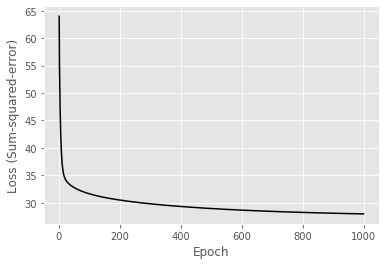

Code execution time: 0.17 seconds
true positive: 5
false negative: 9
false positive: 5
true negative: 47

accuracy: 0.79
precision: 0.5
recall: 0.36
f_score: 0.42



,Loss (Sum-squared-error),Epoch
0,64.000000,1
1,55.408282,2
2,50.852516,3
3,47.357266,4
4,44.641352,5
...,...,...
995,27.952268,996
996,27.951142,997
997,27.950017,998
998,27.948895,999


In [30]:
import matplotlib.pyplot as plt
import time

# Implementation Adaline algorithm Part A:
# Third Example: number of epochs (n_epochs) = 1000, learning rate (lr) = 0.001
# Most recommended is that learning rate should be equal to 0.1 <= n_epochs * lr <= 1.0 --> 
# 0.1/n_epochs <= lr --> 0.1 / 1000 = 0.0001 <= lr

# start time report
start = time.time()


# Calculating 66% of dataset length
train_len, test_len = get_train_n_test_len(myLst, 0.66)


# Creating sets for train and test features (datas)
# train_f == train features, test_f == test features
train_f, train_diagnoses, test_f, test_diagnoses \
    = data_split(myLst, train_len, test_len, False)
train_f = standardization(train_f)
test_f = standardization(test_f)


# Array of weights, training data and weigths
# w == weights
# Initialize the weight (to zero) for each feature (and the dummy feature, x0)
# Training the train features and diagnoses with all initial wights, learning rate and num of epochs
# Getting fixed (or updated) weights and array of Loss values (training error).
w = np.zeros(1 + train_f.shape[1])
w, loss_array = train_n_comp_loss(train_f, train_diagnoses, w, 0.001, 1000)


# Plot the training error
plt.plot(range(1, len(loss_array) + 1), loss_array, color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.show()


# predict target of tests features by our fixed (or updated) weights, threshold, and pos and neg values
# calculate actual recurred (yes) and not recurred (no)
# get predictions of our real pos and neg results
# act_rec == actual recurred (yes), act_not_rec == actual not recurred (no)
# true_pos == true positive, false_neg == false negative, false_pos == false positive, true_neg == true negative
predictions = predict(test_f, w, 0.0, 1, -1)
act_rec, act_not_rec = calc_actual(test_diagnoses)
true_pos, false_neg, false_pos, true_neg = check_predictions(test_diagnoses, predictions)


# end time report
end = time.time()
print(f"Code execution time: {round(end - start, 2)} seconds")
check_score(true_pos, false_neg, false_pos, true_neg)


# Loss == t - y_in
df3 = pd.DataFrame({'Loss (Sum-squared-error)' : loss_array, 'Epoch' : range(1, len(loss_array) + 1)})
df3

In [31]:
'''
Our onclusions:

If the number of rounds is too large -> it will take the algorithm a long time to converge and it impairs the exact calculation of the final results

If the learning rate is too small -> the algorithm will not be able to converge on the ideal number of rounds we set (1000)

If the learning rate is too large -> the algorithm can miss the convergence point of the number of ideal turns we have set (1000)
'''

df2 = pd.DataFrame({'First method: 66%-33%': ['',''] , 
                   ' ':    [ "Actual: yes  ",  "Actual: no  "],
                   'Predicted: yes': [f"true positive: {round(true_pos / act_rec, 2)}%",
                                      f"false positive: {round(false_pos / act_not_rec, 2)}%"],
                   'Predicted: no': [f"false negative: {round(false_neg / act_rec, 2)}%", 
                                      f"true negative: {round(true_neg / act_not_rec, 2)}%"]})

df2.head()

,First method: 66%-33%,,Predicted: yes,Predicted: no
0,,Actual: yes,true positive: 0.36%,false negative: 0.64%
1,,Actual: no,false positive: 0.1%,true negative: 0.9%


In [32]:
import matplotlib.pyplot as plt
import time

# Implementation Adaline algorithm Part B: "Cross-validation"
# Third Example: number of epochs (n_epochs) = 10000, learning rate (lr) = 0.0001
# Most recommended is that learning rate should be equal to 0.1 <= n_epochs * lr <= 1.0 --> 
# 0.1/n_epochs <= lr --> 0.1 / 1000 = 0.0001 <= lr


# start time report
start_set1 = time.time()
start_total = time.time()


# Calculating 66% of dataset length
train_len, test_len = get_train_n_test_len(myLst, 0.66)


# Creating 3 sets for train and test features (datas)
# train_f == train features, test_f == test features
train_f1, train_diagnoses1, test_f1, test_diagnoses1 \
    = data_split(myLst, train_len, test_len, False)


train_f2, train_diagnoses2, test_f2, test_diagnoses2 \
    = data_split(myLst, train_len, test_len, True)


train_f3, train_diagnoses3, test_f3, test_diagnoses3 \
    = data_split(myLst, train_len, test_len, False)


train_f1 = standardization(train_f1)
test_f1 = standardization(test_f1)


train_f2 = standardization(train_f2)
test_f2 = standardization(test_f2)


train_f3 = standardization(train_f3)
test_f3 = standardization(test_f3)

First features set:
true positive: 5
false negative: 9
false positive: 5
true negative: 47

accuracy: 0.79
precision: 0.5
recall: 0.36
f_score: 0.42



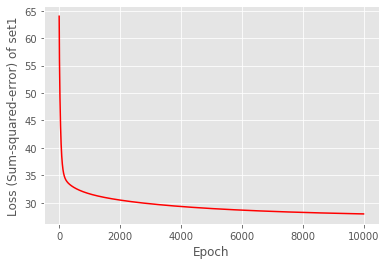

Code execution time of set1: 6.13 seconds


,Loss (Sum-squared-error),Epoch
0,64.000000,1
1,62.805735,2
2,61.745835,3
3,60.795017,4
4,59.933235,5
...,...,...
9995,27.947683,9996
9996,27.947571,9997
9997,27.947460,9998
9998,27.947348,9999


In [33]:
## Set 1:

# Array of weights, training data and weigths of set 1
# w1 == weights of set 1, 
# Initialize the weight for each feature (and the dummy feature, x0)
w1 = np.zeros(1 + train_f1.shape[1])
w1, loss_array1 = train_n_comp_loss(train_f1, train_diagnoses1, w1, 0.0001, 10000)


# predict target of tests features by our weights
# calculate real positives and negatives examples
# check prediction correctness
# true_pos1 == true positive, false_neg1 == false negative, false_pos1 == false positive, 
# true_neg1 == true negative of set 1
predictions1 = predict(test_f1, w1, 0.0, 1, -1)
actual_recurred1, actual_not_recurred1 = calc_actual(test_diagnoses1)
true_pos1, false_neg1, false_pos1, true_neg1 = check_predictions(test_diagnoses1, predictions1)


print("First features set:")
check_score(true_pos1, false_neg1, false_pos1, true_neg1)



# Plot the training error
plt.plot(range(1, len(loss_array1) + 1), loss_array1, color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error) of set1')
plt.show()


end_set1 = time.time()


print(f"Code execution time of set1: {round(end_set1 - start_set1, 2)} seconds")
# Loss == t - y_in
df3_1 = pd.DataFrame({'Loss (Sum-squared-error)' : loss_array1, 'Epoch' : range(1, len(loss_array1) + 1)})
df3_1



In [34]:

df2_1 = pd.DataFrame({'First method: 66%-33%': ['',''] , 
                   ' ':    [ "Actual: yes  ",  "Actual: no  "],
                   'Predicted: yes': [f"true positive: {round(true_pos1 / actual_recurred1, 2)}%",
                                      f"false positive: {round(false_pos1 / actual_not_recurred1, 2)}%"],
                   'Predicted: no': [f"false negative: {round(false_neg1 / actual_recurred1, 2)}%", 
                                      f"true negative: {round(true_neg1 / actual_not_recurred1, 2)}%"]})

df2_1.head()

,First method: 66%-33%,,Predicted: yes,Predicted: no
0,,Actual: yes,true positive: 0.36%,false negative: 0.64%
1,,Actual: no,false positive: 0.1%,true negative: 0.9%


Second features set:
true positive: 9
false negative: 6
false positive: 7
true negative: 44

accuracy: 0.8
precision: 0.56
recall: 0.6
f_score: 0.58



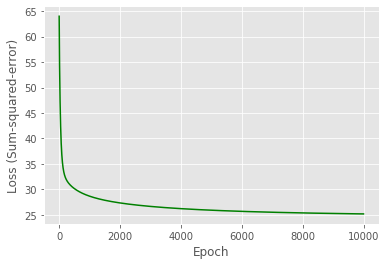

Code execution time of set2: 0.72 seconds


,Loss (Sum-squared-error),Epoch
0,64.000000,1
1,62.992992,2
2,62.059908,3
3,61.188883,4
4,60.370505,5


In [35]:
## Set 2:

start_set2 = time.time()


# Array of weights, training data and weigths of set 2
# w2 == weights of set 2, 
# Initialize the weight for each feature (and the dummy feature, x0)
w2 = np.zeros(1 + train_f2.shape[1])
w2, loss_array2= train_n_comp_loss(train_f2, train_diagnoses2, w2, 0.0001, 10000)


# predict target of tests features by our weights
# calculate real positives and negatives examples
# check prediction correctness
# true_pos2 == true positive, false_neg2 == false negative, false_pos2 == false positive, 
# true_neg2 == true negative of set 2
predictions2 = predict(test_f2, w2, 0.0, 1, -1)
actual_recurred2, actual_not_recurred2 = calc_actual(test_diagnoses2)
true_pos2, false_neg2, false_pos2, true_neg2 = check_predictions(test_diagnoses2, predictions2)


print("Second features set:")
check_score(true_pos2, false_neg2, false_pos2, true_neg2)


# Plot the training error
plt.plot(range(1, len(loss_array2) + 1), loss_array2, color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.show()


end_set2 = time.time()


print(f"Code execution time of set2: {round(end_set2 - start_set2, 2)} seconds")
# Loss == t - y_in
df3_2 = pd.DataFrame({'Loss (Sum-squared-error)' : loss_array2, 'Epoch' : range(1, len(loss_array2) + 1)})
df3_2.head()



In [36]:
df2_2 = pd.DataFrame({'First method: 66%-33%': ['',''] , 
                   ' ':    [ "Actual: yes  ",  "Actual: no  "],
                   'Predicted: yes': [f"true positive: {round(true_pos2 / actual_recurred2, 2)}%",
                                      f"false positive: {round(false_pos2 / actual_not_recurred2, 2)}%"],
                   'Predicted: no': [f"false negative: {round(false_neg2 / actual_recurred2, 2)}%", 
                                      f"true negative: {round(true_neg2 / actual_not_recurred2, 2)}%"]})

df2_2.head()

,First method: 66%-33%,,Predicted: yes,Predicted: no
0,,Actual: yes,true positive: 0.6%,false negative: 0.4%
1,,Actual: no,false positive: 0.14%,true negative: 0.86%


Third features set:
true positive: 5
false negative: 9
false positive: 5
true negative: 47

accuracy: 0.79
precision: 0.5
recall: 0.36
f_score: 0.42



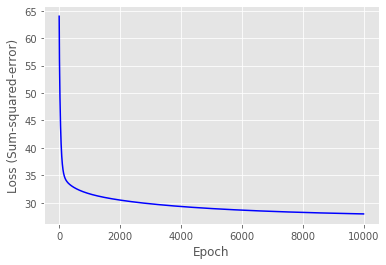

Code execution time of set3: 0.52 seconds


,Loss (Sum-squared-error),Epoch
0,64.000000,1
1,62.805735,2
2,61.745835,3
3,60.795017,4
4,59.933235,5
...,...,...
9995,27.947683,9996
9996,27.947571,9997
9997,27.947460,9998
9998,27.947348,9999


In [37]:
## Set 3:

start_set3 = time.time()


# Array of weights, training data and weigths of set 3
# w3 == weights of set 3, 
# Initialize the weight for each feature (and the dummy feature, x0)
w3 = np.zeros(1 + train_f3.shape[1])
w3, loss_array3= train_n_comp_loss(train_f3, train_diagnoses3, w3, 0.0001, 10000)


# predict target of tests features by our weights
# calculate real positives and negatives examples
# check prediction correctness
# true_pos3 == true positive, false_neg3 == false negative, false_pos3 == false positive, 
# true_neg3 == true negative of set 3
predictions3 = predict(test_f3, w3, 0.0, 1, -1)
actual_recurred3, actual_not_recurred3 = calc_actual(test_diagnoses3)
true_pos3, false_neg3, false_pos3, true_neg3 = check_predictions(test_diagnoses3, predictions3)


print("Third features set:")
check_score(true_pos3, false_neg3, false_pos3, true_neg3)


# Plot the training error
plt.plot(range(1, len(loss_array3) + 1), loss_array3, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.show()


end_set3 = time.time()


print(f"Code execution time of set3: {round(end_set3 - start_set3, 2)} seconds")
# Loss == t - y_in
df3_3 = pd.DataFrame({'Loss (Sum-squared-error)' : loss_array3, 'Epoch' : range(1, len(loss_array3) + 1)})
df3_3


In [38]:
df2_3 = pd.DataFrame({'First method: 66%-33%': ['',''] , 
                   ' ':    [ "Actual: yes  ",  "Actual: no  "],
                   'Predicted: yes': [f"true positive: {round(true_pos3 / actual_recurred3, 2)}%",
                                      f"false positive: {round(false_pos3 / actual_not_recurred3, 2)}%"],
                   'Predicted: no': [f"false negative: {round(false_neg3 / actual_recurred3, 2)}%", 
                                      f"true negative: {round(true_neg3 / actual_not_recurred3, 2)}%"]})

df2_3.head()

,First method: 66%-33%,,Predicted: yes,Predicted: no
0,,Actual: yes,true positive: 0.36%,false negative: 0.64%
1,,Actual: no,false positive: 0.1%,true negative: 0.9%


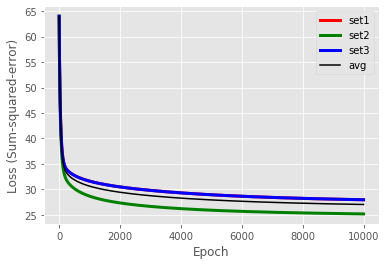

Code execution total time: 24.36 seconds


,Loss (Sum-squared-error) of all sets (total),Epoch
0,64.000000,1
1,62.868154,2
2,61.850526,3
3,60.926306,4
4,60.078992,5
...,...,...
9995,27.020701,9996
9996,27.020600,9997
9997,27.020500,9998
9998,27.020399,9999


In [39]:
# All sets (Total)
# Plot the training error
plt.plot(range(1, len(loss_array1) + 1), loss_array1, color='red', label='set1', linewidth=3.0)
plt.plot(range(1, len(loss_array2) + 1), loss_array2, color='green', label='set2', linewidth=3.0)
plt.plot(range(1, len(loss_array3) + 1), loss_array3, color='blue', label='set3', linewidth=3.0)
plt.plot(range(1, len(loss_array3) + 1), 1 / 3 * (loss_array1 + loss_array2 + loss_array3), color='black', label='avg')
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.legend(loc='best')
plt.show()


end_total = time.time()


print(f"Code execution total time: {round(end_total - start_total, 2)} seconds")


# Loss == t - y_in
df3_total = pd.DataFrame({'Loss (Sum-squared-error) of all sets (total)' : 1 / 3 * (loss_array1 + loss_array2 + loss_array3), 'Epoch' : range(1, len(loss_array3) + 1)})
df3_total

In [40]:
param1 = 1/3 * ( (true_pos1 / actual_recurred1) + (true_pos2 / actual_recurred2) + (true_pos3 / actual_recurred3) )
param2 = 1/3 * ( (false_pos1 / actual_not_recurred1) + (false_pos2 / actual_not_recurred2) + (false_pos3 / actual_not_recurred3) )
param3 = 1/3 * ( (false_neg1 / actual_recurred1) + (false_neg2 / actual_recurred2) + (false_neg3 / actual_recurred3) )
param4 = 1/3 * ( (true_neg1 / actual_not_recurred1) + (true_neg2 / actual_not_recurred2) + (true_neg3 / actual_not_recurred3) )

df2_total = pd.DataFrame({'First method: 66%-33%': ['',''] , 
                   ' ':    [ "Actual: yes  ",  "Actual: no  "],
                   'Predicted: yes': [f"true positive: {round(param1, 2)}%",
                                      f"false positive: {round(param2, 2)}%"],
                   'Predicted: no': [f"false negative: {round(param3, 2)}%", 
                                      f"true negative: {round(param4, 2)}%"]})

df2_total.head()



,First method: 66%-33%,,Predicted: yes,Predicted: no
0,,Actual: yes,true positive: 0.44%,false negative: 0.56%
1,,Actual: no,false positive: 0.11%,true negative: 0.89%


In [230]:
# Backpropogation (with tensorflow) Part:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 


# train features (data) with one hidden layer
# f == features, t == targets f_len == features length, out == output 
def train_one_hidden_layer(f, t):
    f_len = len(f[0])
    out = 1
    
    # "tf.placeholder()": Inserts a placeholder for a tensor that will be always fed
    # Source "tf.placeholder()" (TensorFlow): 
    # https://www.tensorflow.org/api_docs/python/tf/keras/backend/placeholder
    # Placing holder of features length => Our output: x= Tensor("Placeholder_91:0", shape=(?, 33), dtype=float32)
    x = tf.placeholder(tf.float32, [None, f_len])
    
    
    # Placing holder of output => Our output: y_= Tensor("Placeholder_92:0", shape=(?, 1), dtype=float32)
    y_ = tf.placeholder(tf.float32, [None, out])
    
    
    # hidden layer length == 7
    # The recommended formula to choose number of hidden layer
    # Source to formula: 
    # https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
    hidden_len = 7
    
    
    # Placing holder of First hidden layer weights => Our output:
    # w1= <tf.Variable 'Variable_174:0' shape=(33, 10) dtype=float32_ref>
    # tf.truncated_normal(): Outputs random values from a truncated normal distribution
    # "tf.truncated_normal()"
    # Source "tf.truncated_normal()" (TensorFlow): 
    # https://www.tensorflow.org/api_docs/python/tf/random/truncated_normal
    # tf.truncated_normal() => Our output: Tensor("truncated_normal_94:0", shape=(33, 10), dtype=float32)
    # Source "tf.Variable()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/Variable
    w1 = tf.Variable(tf.truncated_normal([f_len, hidden_len], stddev=0.1))
    
    
    # Placing holder of first hidden layer bias =>
    # Our output: b1= <tf.Variable 'Variable_175:0' shape=(10,) dtype=float32_ref>
    b1 = tf.Variable(tf.constant(0.1, shape=[hidden_len]))
    
    
    # Placing holder of first hidden layer sigmoid => x*w1 + b1 => x*w1(i) + bias1 =>
    # Our output: z1= Tensor("Sigmoid_84:0", shape=(?, 10), dtype=float32)
    # tf.nn: Wrappers for primitive Neural Net (NN) Operations
    # Source "tf.nn" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/nn
    # tf.math.sigmoid(): Computes sigmoid of x element-wise
    # Formula for calculating sigmoid(x): y = 1 / (1 + exp(-x))
    # Source "tf.nn.sigmoid()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/math/sigmoid
    z1 = tf.nn.sigmoid(tf.matmul(x, w1) + b1)
    
    
    # Placing holder of second hidden layer weights =>
    # Our output: w2= <tf.Variable 'Variable_176:0' shape=(10, 1) dtype=float32_ref>
    #
    # "stddev()" function to calculate standard deviation.
    # *Standard deviation is a measure of the spread of a data value system
    # And gives a degree of divergence.
    # **A low measure of Standard Deviation indicates that the data are less spread out.
    # **High value of Standard Deviation shows that the data in a set are spread apart from 
    # their mean average values.
    # A useful property of the standard deviation is that, unlike the variance, it is expressed in 
    # the same units as the data.
    # Source "stddev()" (GeeksforGeeks) : https://www.geeksforgeeks.org/python-statistics-stdev/
    w2 = tf.Variable(tf.truncated_normal([hidden_len, out], stddev=0.1))
    
    
    # Placing holder of second (hidden) layer bias =>
    # Our output: b2= <tf.Variable 'Variable_177:0' shape=() dtype=float32_ref>
    b2 = tf.Variable(0.1, [out], dtype=tf.float32)
    
    
    # y = (z1 * w2) + b2
    # Source "tf.matmul()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/linalg/matmul
    # tf.matmul => multiply matrixes => tf.matmul(z1, w2) => z1 * w2
    y = tf.matmul(z1,w2) + b2
    
    
    # Loss: Sum of squared error
    # "tf.square(y - y_)" => (y - y_)^2
    # tf.square(y - y_) => Tensor("Square_42:0", shape=(?, 1), dtype=float32)
    # Source "tf.square(y_ - y)" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/math/square
    # tf.reduce_mean(): Computes the mean of elements across dimensions of a tensor
    # Source "tf.reduce_mean()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean
    loss = tf.reduce_mean(tf.square(y - y_))
    
    
    # tf.train.GradientDescentOptimizer(): Optimizer that implements the gradient descent algorithm
    # Source "tf.train.GradientDescentOptimizer()" (TensorFlow): 
    # https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/GradientDescentOptimizer
    # tfp.math.minimize: Minimize a loss function using a provided optimizer
    # Source "tfp.math.minimize" (TensorFlow): 
    # https://www.tensorflow.org/probability/api_docs/python/tfp/math/minimize
    # update => Our output: 
    # update= name: "GradientDescent_48"
    # op: "NoOp"
    # input: "^GradientDescent_48/update_Variable_202/ApplyGradientDescent"
    # input: "^GradientDescent_48/update_Variable_203/ApplyGradientDescent"
    # input: "^GradientDescent_48/update_Variable_204/ApplyGradientDescent"
    # input: "^GradientDescent_48/update_Variable_205/ApplyGradientDescent"
    update = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    
    loss_array = np.array([])
    
    
    # tf.Session(): A class for running TensorFlow operations
    # Source "tf.Session()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/compat/v1/Session
    # sess => Our output: <tensorflow.python.client.session.Session object at 0x000001B8C05B2D88>
    sess = tf.Session()
    
    # Our output: sess.run(tf.global_variables_initializer()) None
    sess.run(tf.global_variables_initializer())
    for i in range(0, 10000):
        sess.run(update, feed_dict={x: f, y_: t})
        if i % 1000 == 0:
            # "feed_dict" argument allows the caller to override the value of tensors in the graph
            loss_array = np.append(loss_array, [loss.eval(session=sess, feed_dict={x: f, y_: t})])
            
    return x, y, sess, loss_array
    


# train features (data) with two hidden layers    
# f == features, t == targets f_len == features length, out == output  
def train_two_hidden_layer(f, t):
    f_len = len(f[0])
    out = 1
    
    
    # "tf.placeholder()": Inserts a placeholder for a tensor that will be always fed
    # Source "tf.placeholder()" (TensorFlow): 
    # https://www.tensorflow.org/api_docs/python/tf/keras/backend/placeholder
    # Placing holder of features length => Our output: x= Tensor("Placeholder_91:0", shape=(?, 33), dtype=float32)
    x = tf.placeholder(tf.float32, [None, f_len])
    
    
    # Placing holder of output => Our output: y_= Tensor("Placeholder_92:0", shape=(?, 1), dtype=float32)
    y_ = tf.placeholder(tf.float32, [None, out])
    
    
    # First hidden layer length == 7, Second hidden layer length == 4
    # The recommended formula to choose number of hidden layer
    # Source to formula: 
    # https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
    (hidden_len, hidden2_len) = (12, 3)
    
    
    # Placing holder of First hidden layer weights => Our output:
    # w1= <tf.Variable 'Variable_174:0' shape=(33, 10) dtype=float32_ref>
    # tf.truncated_normal(): Outputs random values from a truncated normal distribution
    # "tf.truncated_normal()"
    # Source "tf.truncated_normal()" (TensorFlow): 
    # https://www.tensorflow.org/api_docs/python/tf/random/truncated_normal
    # tf.truncated_normal() => Our output: Tensor("truncated_normal_94:0", shape=(33, 10), dtype=float32)
    # Source "tf.Variable()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/Variable
    w1 = tf.Variable(tf.truncated_normal([f_len, hidden_len], stddev=0.1))
    
    
    # Placing holder of first hidden layer bias =>
    # Our output: b1= <tf.Variable 'Variable_175:0' shape=(10,) dtype=float32_ref>
    b1 = tf.Variable(tf.constant(0.1, shape=[hidden_len]))
    
    
    # z1 = x*w1 + b1
    # tf.nn.relu(): Computes rectified linear: max(features, 0)
    # Source "tf.nn.relu()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/nn/relu
    z1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    
    
    # Placing holder of first hidden layer weights =>
    # Our output: w2= <tf.Variable 'Variable_176:0' shape=(10, 1) dtype=float32_ref>
    #
    # "stddev()" function to calculate standard deviation.
    # *Standard deviation is a measure of the spread of a data value system
    # And gives a degree of divergence.
    # **A low measure of Standard Deviation indicates that the data are less spread out.
    # **High value of Standard Deviation shows that the data in a set are spread apart from 
    # their mean average values.
    # A useful property of the standard deviation is that, unlike the variance, it is expressed in 
    # the same units as the data.
    # Source "stddev()" (GeeksforGeeks) : https://www.geeksforgeeks.org/python-statistics-stdev/
    w2 = tf.Variable(tf.truncated_normal([hidden_len, hidden2_len], stddev=0.1))
    
    
    # Placing holder of second (hidden) layer bias =>
    # Our output: b2= <tf.Variable 'Variable_177:0' shape=() dtype=float32_ref>
    b2 = tf.Variable(tf.constant(0.1, shape=[hidden2_len]))
    
    
    # z2 = z1*w2 + b2
    # tf.nn.relu(): Computes rectified linear: max(features, 0)
    # Source "tf.nn.relu()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/nn/relu
    z2 = tf.nn.relu(tf.matmul(z1, w2) + b2)
    
    
    # Placing holder of second hidden layer weights =>
    # Our output: w2= <tf.Variable 'Variable_176:0' shape=(10, 1) dtype=float32_ref>
    #
    # "stddev()" function to calculate standard deviation.
    # *Standard deviation is a measure of the spread of a data value system
    # And gives a degree of divergence.
    # **A low measure of Standard Deviation indicates that the data are less spread out.
    # **High value of Standard Deviation shows that the data in a set are spread apart from 
    # their mean average values.
    # A useful property of the standard deviation is that, unlike the variance, it is expressed in 
    # the same units as the data.
    # Source "stddev()" (GeeksforGeeks) : https://www.geeksforgeeks.org/python-statistics-stdev/
    w3 = tf.Variable(tf.truncated_normal([hidden2_len, out], stddev=0.1))
    
    
    # Placing holder of second hidden layer bias
    b3 = tf.Variable(0.1, [out], dtype=tf.float32)

    
    # y = (z2 * w3) + b3
    # Source "tf.matmul()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/linalg/matmul
    # tf.matmul => multiply matrixes => tf.matmul(z2, w3) => z2 * w3
    y = tf.matmul(z2, w3) + b3
    
    
    # Loss: Sum of squared error
    # "tf.square(y - y_)" => (y - y_)^2
    # tf.square(y - y_) => Tensor("Square_42:0", shape=(?, 1), dtype=float32)
    # Source "tf.square(y_ - y)" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/math/square
    # tf.reduce_mean(): Computes the mean of elements across dimensions of a tensor
    # Source "tf.reduce_mean()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean
    loss = tf.reduce_mean(tf.square(y - y_))
    
    
    # tf.train.GradientDescentOptimizer(): Optimizer that implements the gradient descent algorithm
    # Source "tf.train.GradientDescentOptimizer()" (TensorFlow): 
    # https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/GradientDescentOptimizer
    # tfp.math.minimize: Minimize a loss function using a provided optimizer
    # Source "tfp.math.minimize" (TensorFlow): 
    # https://www.tensorflow.org/probability/api_docs/python/tfp/math/minimize
    # update => Our output: 
    # update= name: "GradientDescent_48"
    # op: "NoOp"
    # input: "^GradientDescent_48/update_Variable_202/ApplyGradientDescent"
    # input: "^GradientDescent_48/update_Variable_203/ApplyGradientDescent"
    # input: "^GradientDescent_48/update_Variable_204/ApplyGradientDescent"
    # input: "^GradientDescent_48/update_Variable_205/ApplyGradientDescent"
    update = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    
    loss_array = np.array([])
    
    
    # tf.Session(): A class for running TensorFlow operations
    # Source "tf.Session()" (TensorFlow): https://www.tensorflow.org/api_docs/python/tf/compat/v1/Session
    # sess => Our output: <tensorflow.python.client.session.Session object at 0x000001B8C05B2D88>
    sess = tf.Session()
    
    # Our output: sess.run(tf.global_variables_initializer()) None
    sess.run(tf.global_variables_initializer())
    for i in range(0, 10000):
        sess.run(update, feed_dict={x: f, y_: t})
        if i % 1000 == 0:
            # "feed_dict" argument allows the caller to override the value of tensors in the graph
            loss_array = np.append(loss_array, [loss.eval(session=sess, feed_dict={x: f, y_: t})])
            
    return x, y, sess, loss_array



# Get predictions (backpropogation)
# If [num>= 0.5] => return [1.], Otherwise, returns [-1.]
# f_test == features test
# The eval() method returns the result evaluated from the expression
# Source eval(): https://www.programiz.com/python-programming/methods/built-in/eval
# In our example val its array of small numbers array that should be around to 0.5
# predict_back_prop() method returns array of value (1 or -1) arrays
def predict_back_prop(x, y, sess, f_test):
    val = y.eval(session=sess, feed_dict={x: f_test})
    return np.where(val >= 0.5, 1, -1)



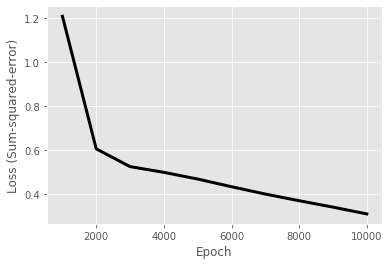

Features set:
true positive: 4
false negative: 10
false positive: 0
true negative: 52

accuracy: 0.85
precision: 1.0
recall: 0.29
f_score: 0.44



,Loss (Sum-squared-error),Epoch
0,1.208034,1000
1,0.605328,2000
2,0.524645,3000
3,0.498712,4000
4,0.468158,5000
5,0.433380,6000
6,0.399969,7000
7,0.369706,8000
8,0.340557,9000
9,0.309753,10000


In [161]:
# Backpropogation (with tensorflow) Part: With one hidden layer:

#start_time = time.time()


# Calculating 66% of dataset length to train and other (34%) to test
# train_len = 194 * 0.66 = 128.04 => 128
# test_len = 194 - 128 = 66
train_len, test_len = get_train_n_test_len(myLst, 0.66)


# Creating sets for train and test features (data) (by spliting data according to the percent separated by 
# date_split method) and the output of their expected results called "train_diagnoses" and 
# "test_diagnoses", respectively.
# train_f == train features, test_f == test features
train_f, train_diagnoses, test_f, test_diagnoses \
    = data_split(myLst, train_len, test_len, False)


# standardization set of train features (data) from bits-type to float type
# print(f"train_f {train_f} ")
train_f = standardization(train_f)


# standardization set of test features (data) from bits-type to float type
# print(f"test_f {test_f} ")
# **Note: The values in the diagnoses datasets are not required to be converted (standardizationed) because 
# they were initially saved as an integer type.
test_f = standardization(test_f)


# For self tests:
#print(f"train_len {train_len} ")
#print(f"test_len {test_len} ")
#print(f"train_f  {train_f} ")
#print(f"train_diagnoses {train_diagnoses} ")
#print(f"test_f {test_f} ")
#print(f"test_diagnoses {test_diagnoses} ")


# Source "np.reshape()" (NumPy): https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
# "np.reshape()" example: np.reshape(3,-1) == np.reshape([-1. 1. -1.]) => [ [-1.] /n [1.] /n [-1.] ]
# train_diagnoses.shape[0] = 128, if [128,] -> [128,1]
train_diagnoses = train_diagnoses.reshape(train_diagnoses.shape[0], -1)

# Training the features set:
x, y, sess, loss_array_back = train_one_hidden_layer(train_f, train_diagnoses)


# Plot the training error
#plt.plot(range(1, len(loss_array1) + 1), loss_array1, color='red', label='set1', linewidth=3.0)
#print(loss_array_back)
plt.plot(range(1 * 1000, (len(loss_array_back) + 1) * 1000, 1000), loss_array_back, color='black', linewidth=3.0)
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.show()


# Our final results set: (true positive, false negative, false positive, true negative) = (a,b,c,b)
print(f"Features set:")
#print(f"check_predictions {check_predictions(test_diagnoses, predict_back_prop(x, y, sess, test_f))} ")
tmp_res = check_predictions(test_diagnoses, predict_back_prop(x, y, sess, test_f))
check_score(tmp_res[0], tmp_res[1], tmp_res[2], tmp_res[3])

#end_time = time.time()


#print(f"Code execution time: {round(end_time - start_time, 2)} seconds")
# Loss == t - y_in
df3 = pd.DataFrame({'Loss (Sum-squared-error)' : loss_array_back, 'Epoch' :range(1 * 1000, (len(loss_array_back) + 1) * 1000, 1000)})
df3


# Our results and conclusions (with one hidden layer):
# First case: n_epochs = 10000, lr = 0.00001, stddev() = 0.1 => Min Loss = 0.9170, (0,14,0,52)
# Second case: n_epochs = 10000, lr = 0.0001, stddev() = 0.1 => Min Loss = 0.7283, (0,14,0,52)
# Third case: n_epochs = 10000, lr = 0.001, stddev() = 0.1 => Min Loss = 0.6170, (0,14,0,52)
# Fourth case: n_epochs = 10000, lr = 0.01, stddev() = 0.1 => Min Loss = 0.3514, (4,10,1,51), acc= 0.83
# Fifth case: n_epochs = 10000, lr = 0.01, stddev() = 0.1 => Min Loss = 0.2980, (4,10,0,52), acc= 0.85
## We can see that the standard deviation value, choosing number to hidden layer and choosing a learning rate 
## plays a significant role in finding the convergence point and getting the maximum result accuracy.
## (4,10,0,52) => It can be seen that this is the better solution because our algorithm matched its prediction 
## accurately to the target results of cancer recurrence prediction and cancer recurrence prediction.
## In other results such as (0,14,0,52) and (4,10,1,51), for example, we can see that our algorithm has made 
## some predictions different from the target results.
## This is the reason we cited the factors (number of epochs, learning rate, standard deviation, etc.) that, if 
## we do not precisely target them as accurately as possible, that may affect non-convergence to the minimum 
## point and reach the most accurate result.
## **Note: It is important to note that in the beginning, we trained our training data well 
##         (66 percent of the data) to train the algorithm and predict the test data as the target results.

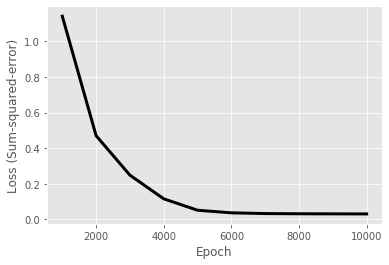

Features set:
true positive: 7
false negative: 7
false positive: 1
true negative: 51

accuracy: 0.88
precision: 0.88
recall: 0.5
f_score: 0.64



,Loss (Sum-squared-error),Epoch
0,1.141000,1000
1,0.469765,2000
2,0.248087,3000
3,0.115115,4000
4,0.050980,5000
5,0.036435,6000
6,0.032273,7000
7,0.031162,8000
8,0.030662,9000
9,0.030334,10000


In [236]:
# Backpropogation (with tensorflow) Part: With two hidden layers:

#start_time = time.time()


# Calculating 66% of dataset length to train and other (34%) to test
# train_len = 194 * 0.66 = 128.04 => 128
# test_len = 194 - 128 = 66
train_len, test_len = get_train_n_test_len(myLst, 0.66)


# Creating sets for train and test features (data) (by spliting data according to the percent separated by 
# date_split method) and the output of their expected results called "train_diagnoses" and 
# "test_diagnoses", respectively.
# train_f == train features, test_f == test features
train_f, train_diagnoses, test_f, test_diagnoses \
    = data_split(myLst, train_len, test_len, False)


# standardization set of train features (data) from bits-type to float type
# print(f"train_f {train_f} ")
train_f = standardization(train_f)


# standardization set of test features (data) from bits-type to float type
# print(f"test_f {test_f} ")
# **Note: The values in the diagnoses datasets are not required to be converted (standardizationed) because 
# they were initially saved as an integer type.
test_f = standardization(test_f)


# For self tests:
#print(f"train_len {train_len} ")
#print(f"test_len {test_len} ")
#print(f"train_f  {train_f} ")
#print(f"train_diagnoses {train_diagnoses} ")
#print(f"test_f {test_f} ")
#print(f"test_diagnoses {test_diagnoses} ")


# Source "np.reshape()" (NumPy): https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
# "np.reshape()" example: np.reshape(3,-1) == np.reshape([-1. 1. -1.]) => [ [-1.] /n [1.] /n [-1.] ]
# train_diagnoses.shape[0] = 128, if [128,] -> [128,1]
train_diagnoses = train_diagnoses.reshape(train_diagnoses.shape[0], -1)

# Training the features set:
x, y, sess, loss_array_back = train_two_hidden_layer(train_f, train_diagnoses)


# Plot the training error
#plt.plot(range(1, len(loss_array1) + 1), loss_array1, color='red', label='set1', linewidth=3.0)
#print(loss_array_back)
plt.plot(range(1 * 1000, (len(loss_array_back) + 1) * 1000, 1000), loss_array_back, color='black', linewidth=3.0)
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.show()


# Our final results set: (true positive, false negative, false positive, true negative) = (a,b,c,b)
print(f"Features set:")
#print(f"check_predictions {check_predictions(test_diagnoses, predict_back_prop(x, y, sess, test_f))} ")
tmp_res = check_predictions(test_diagnoses, predict_back_prop(x, y, sess, test_f))
check_score(tmp_res[0], tmp_res[1], tmp_res[2], tmp_res[3])

#end_time = time.time()


#print(f"Code execution time: {round(end_time - start_time, 2)} seconds")
# Loss == t - y_in
df3 = pd.DataFrame({'Loss (Sum-squared-error)' : loss_array_back, 'Epoch' :range(1 * 1000, (len(loss_array_back) + 1) * 1000, 1000)})
df3



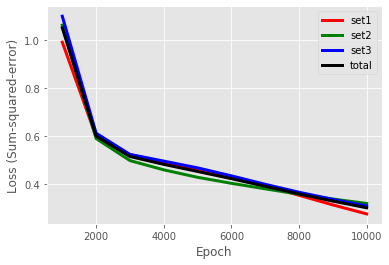

Feature set1:
true positive: 2
false negative: 12
false positive: 0
true negative: 52

accuracy: 0.82
precision: 1.0
recall: 0.14
f_score: 0.25

Feature set2:
true positive: 4
false negative: 11
false positive: 3
true negative: 48

accuracy: 0.79
precision: 0.57
recall: 0.27
f_score: 0.36

Feature set3:
true positive: 1
false negative: 13
false positive: 0
true negative: 52

accuracy: 0.8
precision: 1.0
recall: 0.07
f_score: 0.13



In [239]:
# Backpropogation (with tensorflow) "Cross-validation" Part: With one hidden layer

# Calculating 66% of dataset length to train and other (34%) to test
# train_len = 194 * 0.66 = 128.04 => 128
# test_len = 194 - 128 = 66
train_len, test_len = get_train_n_test_len(myLst, 0.66)


# Creating 3 sets for train and test features (data) (by spliting data according to the percent separated by 
# date_split method) and the output of their expected results called "train_diagnoses" and 
# "test_diagnoses", respectively.
# train_f == train features, test_f == test features

# First set:
train_f1, train_diagnoses1, test_f1, test_diagnoses1 \
    = data_split(myLst, train_len, test_len, False)

# Second set:
train_f2, train_diagnoses2, test_f2, test_diagnoses2 \
    = data_split(myLst, train_len, test_len, True)

# Third set:
train_f3, train_diagnoses3, test_f3, test_diagnoses3 \
    = data_split(myLst, train_len, test_len, False)


# standardization set of train features (data) from bits-type to float type
# print(f"train_f {train_f} ")
#
# standardization set of test features (data) from bits-type to float type
# print(f"test_f {test_f} ")
# **Note: The values in the diagnoses datasets are not required to be converted (standardizationed) because 
# they were initially saved as an integer type.
train_f1 = standardization(train_f1)
test_f1 = standardization(test_f1)

train_f2 = standardization(train_f2)
test_f2 = standardization(test_f2)

train_f3 = standardization(train_f3)
test_f3 = standardization(test_f3)


# Source "np.reshape()" (NumPy): https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
# "np.reshape()" example: np.reshape(3,-1) == np.reshape([-1. 1. -1.]) => [ [-1.] /n [1.] /n [-1.] ]
# train_diagnoses.shape[0] = 128, if [128,] -> [128,1]
train_diagnoses1 = train_diagnoses1.reshape(train_diagnoses1.shape[0], -1)
train_diagnoses2 = train_diagnoses2.reshape(train_diagnoses2.shape[0], -1)
train_diagnoses3 = train_diagnoses3.reshape(train_diagnoses3.shape[0], -1)


# Training the features set:
x1, y1, sess1, loss_array_back1 = train_one_hidden_layer(train_f1, train_diagnoses1)
x2, y2, sess2, loss_array_back2 = train_one_hidden_layer(train_f2, train_diagnoses2)
x3, y3, sess3, loss_array_back3 = train_one_hidden_layer(train_f3, train_diagnoses3)


# Plot the training error
# loss_total == average of all 3 sets
loss_total = 1/3 * (loss_array_back1 + loss_array_back2 + loss_array_back3)
plt.plot(range(1 * 1000, (len(loss_array_back1) + 1) * 1000, 1000), loss_array_back1, color='red', label='set1', linewidth=3.0)
plt.plot(range(1 * 1000, (len(loss_array_back2) + 1) * 1000, 1000), loss_array_back2, color='green', label='set2', linewidth=3.0)
plt.plot(range(1 * 1000, (len(loss_array_back3) + 1) * 1000, 1000), loss_array_back3, color='blue', label='set3', linewidth=3.0)
plt.plot(range(1 * 1000, (len(loss_total) + 1) * 1000, 1000), loss_total, color='black', label='total', linewidth=3.0)
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.legend(loc='best')
plt.show()


# Our final results sets: (true positive, false negative, false positive, true negative) = (a,b,c,b)

print(f"Feature set1:")
tmp_res1 = check_predictions(test_diagnoses1, predict_back_prop(x1, y1, sess1, test_f1))
check_score(tmp_res1[0], tmp_res1[1], tmp_res1[2], tmp_res1[3])


print(f"Feature set2:")
tmp_res2 = check_predictions(test_diagnoses2, predict_back_prop(x2, y2, sess2, test_f2))
check_score(tmp_res2[0], tmp_res2[1], tmp_res2[2], tmp_res2[3])


print(f"Feature set3:")
tmp_res3 = check_predictions(test_diagnoses3, predict_back_prop(x3, y3, sess3, test_f3))
check_score(tmp_res3[0], tmp_res3[1], tmp_res3[2], tmp_res3[3])




In [241]:
# First set table loss:
# Loss == t - y_in
df3_1 = pd.DataFrame({'Loss (Sum-squared-error) of set1' : loss_array_back1, 'Epoch' :range(1 * 100, (len(loss_array_back1) 
                                                                                              + 1) * 100, 100)})
df3_1


,Loss (Sum-squared-error) of set1,Epoch
0,0.992339,100
1,0.599473,200
2,0.524425,300
3,0.493046,400
4,0.463547,500
5,0.431598,600
6,0.394834,700
7,0.354942,800
8,0.314818,900
9,0.277323,1000


In [242]:
# Second set table loss:
# Loss == t - y_in
df3_2 = pd.DataFrame({'Loss (Sum-squared-error) of set2' : loss_array_back2, 'Epoch' :range(1 * 100, (len(loss_array_back2) 
                                                                                              + 1) * 100, 100)})
df3_2


,Loss (Sum-squared-error) of set2,Epoch
0,1.063079,100
1,0.591129,200
2,0.499403,300
3,0.460791,400
4,0.429716,500
5,0.404697,600
6,0.381797,700
7,0.359320,800
8,0.339391,900
9,0.320823,1000


In [243]:
# Third set table loss:
# Loss == t - y_in
df3_3 = pd.DataFrame({'Loss (Sum-squared-error) of set3' : loss_array_back3, 'Epoch' :range(1 * 100, (len(loss_array_back3) 
                                                                                              + 1) * 100, 100)})
df3_3

,Loss (Sum-squared-error) of set3,Epoch
0,1.100323,100
1,0.613377,200
2,0.525099,300
3,0.497178,400
4,0.469012,500
5,0.435799,600
6,0.400620,700
7,0.367525,800
8,0.337877,900
9,0.310650,1000


In [244]:
# Second set table loss:
# Loss == t - y_in
df3_total = pd.DataFrame({'Loss (Sum-squared-error) of total' : loss_total, 'Epoch' :range(1 * 100, (len(loss_total) 
                                                                                              + 1) * 100, 100)})
df3_total

,Loss (Sum-squared-error) of total,Epoch
0,1.051914,100
1,0.601326,200
2,0.516309,300
3,0.483672,400
4,0.454092,500
5,0.424031,600
6,0.392417,700
7,0.360596,800
8,0.330695,900
9,0.302932,1000


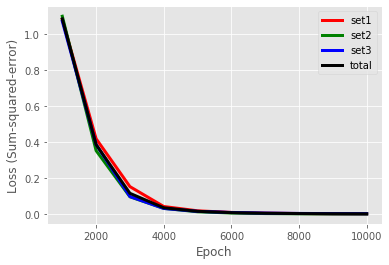

Feature set1:
true positive: 7
false negative: 7
false positive: 4
true negative: 48

accuracy: 0.83
precision: 0.64
recall: 0.5
f_score: 0.56

Feature set2:
true positive: 9
false negative: 6
false positive: 5
true negative: 46

accuracy: 0.83
precision: 0.64
recall: 0.6
f_score: 0.62

Feature set3:
true positive: 4
false negative: 10
false positive: 7
true negative: 45

accuracy: 0.74
precision: 0.36
recall: 0.29
f_score: 0.32



In [245]:
# Backpropogation (with tensorflow) "Cross-validation" Part: With two hidden layer

# Calculating 66% of dataset length to train and other (34%) to test
# train_len = 194 * 0.66 = 128.04 => 128
# test_len = 194 - 128 = 66
train_len, test_len = get_train_n_test_len(myLst, 0.66)


# Creating 3 sets for train and test features (data) (by spliting data according to the percent separated by 
# date_split method) and the output of their expected results called "train_diagnoses" and 
# "test_diagnoses", respectively.
# train_f == train features, test_f == test features

# First set:
train_f1, train_diagnoses1, test_f1, test_diagnoses1 \
    = data_split(myLst, train_len, test_len, False)

# Second set:
train_f2, train_diagnoses2, test_f2, test_diagnoses2 \
    = data_split(myLst, train_len, test_len, True)

# Third set:
train_f3, train_diagnoses3, test_f3, test_diagnoses3 \
    = data_split(myLst, train_len, test_len, False)


# standardization set of train features (data) from bits-type to float type
# print(f"train_f {train_f} ")
#
# standardization set of test features (data) from bits-type to float type
# print(f"test_f {test_f} ")
# **Note: The values in the diagnoses datasets are not required to be converted (standardizationed) because 
# they were initially saved as an integer type.
train_f1 = standardization(train_f1)
test_f1 = standardization(test_f1)

train_f2 = standardization(train_f2)
test_f2 = standardization(test_f2)

train_f3 = standardization(train_f3)
test_f3 = standardization(test_f3)


# Source "np.reshape()" (NumPy): https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
# "np.reshape()" example: np.reshape(3,-1) == np.reshape([-1. 1. -1.]) => [ [-1.] /n [1.] /n [-1.] ]
# train_diagnoses.shape[0] = 128, if [128,] -> [128,1]
train_diagnoses1 = train_diagnoses1.reshape(train_diagnoses1.shape[0], -1)
train_diagnoses2 = train_diagnoses2.reshape(train_diagnoses2.shape[0], -1)
train_diagnoses3 = train_diagnoses3.reshape(train_diagnoses3.shape[0], -1)


# Training the features set:
x1, y1, sess1, loss_array_back1 = train_two_hidden_layer(train_f1, train_diagnoses1)
x2, y2, sess2, loss_array_back2 = train_two_hidden_layer(train_f2, train_diagnoses2)
x3, y3, sess3, loss_array_back3 = train_two_hidden_layer(train_f3, train_diagnoses3)


# Plot the training error
# loss_total == average of all 3 sets
loss_total = 1/3 * (loss_array_back1 + loss_array_back2 + loss_array_back3)
plt.plot(range(1 * 1000, (len(loss_array_back1) + 1) * 1000, 1000), loss_array_back1, color='red', label='set1', linewidth=3.0)
plt.plot(range(1 * 1000, (len(loss_array_back2) + 1) * 1000, 1000), loss_array_back2, color='green', label='set2', linewidth=3.0)
plt.plot(range(1 * 1000, (len(loss_array_back3) + 1) * 1000, 1000), loss_array_back3, color='blue', label='set3', linewidth=3.0)
plt.plot(range(1 * 1000, (len(loss_total) + 1) * 1000, 1000), loss_total, color='black', label='total', linewidth=3.0)
plt.xlabel('Epoch')
plt.ylabel('Loss (Sum-squared-error)')
plt.legend(loc='best')
plt.show()


# Our final results sets: (true positive, false negative, false positive, true negative) = (a,b,c,b)

print(f"Feature set1:")
tmp_res1 = check_predictions(test_diagnoses1, predict_back_prop(x1, y1, sess1, test_f1))
check_score(tmp_res1[0], tmp_res1[1], tmp_res1[2], tmp_res1[3])


print(f"Feature set2:")
tmp_res2 = check_predictions(test_diagnoses2, predict_back_prop(x2, y2, sess2, test_f2))
check_score(tmp_res2[0], tmp_res2[1], tmp_res2[2], tmp_res2[3])


print(f"Feature set3:")
tmp_res3 = check_predictions(test_diagnoses3, predict_back_prop(x3, y3, sess3, test_f3))
check_score(tmp_res3[0], tmp_res3[1], tmp_res3[2], tmp_res3[3])




In [246]:
# First set table loss:
# Loss == t - y_in
df3_1 = pd.DataFrame({'Loss (Sum-squared-error) of set1' : loss_array_back1, 'Epoch' :range(1 * 100, (len(loss_array_back1) 
                                                                                              + 1) * 100, 100)})
df3_1

,Loss (Sum-squared-error) of set1,Epoch
0,1.080022,100
1,0.417427,200
2,0.151810,300
3,0.041449,400
4,0.017573,500
5,0.008670,600
6,0.004633,700
7,0.002723,800
8,0.001427,900
9,0.000764,1000


In [247]:
# Second set table loss:
# Loss == t - y_in
df3_2 = pd.DataFrame({'Loss (Sum-squared-error) of set2' : loss_array_back2, 'Epoch' :range(1 * 100, (len(loss_array_back2) 
                                                                                              + 1) * 100, 100)})
df3_2

,Loss (Sum-squared-error) of set2,Epoch
0,1.096982,100
1,0.351485,200
2,0.095389,300
3,0.031188,400
4,0.012289,500
5,0.005323,600
6,0.002362,700
7,0.001096,800
8,0.000590,900
9,0.000358,1000


In [248]:
# Third set table loss:
# Loss == t - y_in
df3_3 = pd.DataFrame({'Loss (Sum-squared-error) of set3' : loss_array_back3, 'Epoch' :range(1 * 100, (len(loss_array_back3) 
                                                                                              + 1) * 100, 100)})
df3_3

,Loss (Sum-squared-error) of set3,Epoch
0,1.069589,100
1,0.385348,200
2,0.096773,300
3,0.030616,400
4,0.014426,500
5,0.008299,600
6,0.004862,700
7,0.003046,800
8,0.002075,900
9,0.001493,1000


In [249]:
# Second set table loss:
# Loss == t - y_in
df3_total = pd.DataFrame({'Loss (Sum-squared-error) of total' : loss_total, 'Epoch' :range(1 * 100, (len(loss_total) 
                                                                                              + 1) * 100, 100)})
df3_total

,Loss (Sum-squared-error) of total,Epoch
0,1.082198,100
1,0.384753,200
2,0.114657,300
3,0.034417,400
4,0.014763,500
5,0.007430,600
6,0.003952,700
7,0.002288,800
8,0.001364,900
9,0.000872,1000
